In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import math

In [7]:
# Two csv files will be imported, one for storms with at least one injury or death from 1950 to 1964 and other for storms with at least one injury or death from 2009 to 2023. 

In [8]:
# Create a reference the 1950-1964 CSV file
csv_file = 'reorder_narrow_df_1950-1964.csv'

# Read the CSV into a Pandas DataFrame
earliest_years_df = pd.read_csv(csv_file)

# Remove redundant column
earliest_years_df = earliest_years_df.drop('Unnamed: 0', axis=1)

# Print the first five rows of data to the screen
earliest_years_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,PENNSYLVANIA,Tornado,0,2,25000.0,NaN,0.0,NaN,F2,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
1,1950,OKLAHOMA,Tornado,0,6,250000.0,NaN,0.0,NaN,F2,6.8,100,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490
2,1950,OKLAHOMA,Tornado,5,32,250000.0,NaN,0.0,NaN,F4,4.5,200,NaN,NaN,35.08,-96.40,35.13,-96.35,NaN,10096223
3,1950,OKLAHOMA,Tornado,0,3,25000.0,NaN,0.0,NaN,F2,4.3,33,NaN,NaN,36.12,-97.83,36.17,-97.78,NaN,10096230
4,1950,MISSISSIPPI,Tornado,0,2,25000.0,NaN,0.0,NaN,F1,0.1,10,NaN,NaN,34.73,-88.27,NaN,NaN,NaN,10049534


In [9]:
# Create a reference the 2009-2023 CSV file
csv_file = 'reorder_narrow_df_2009-2023.csv'

# Read the CSV into a Pandas DataFrame
most_recent_years_df = pd.read_csv(csv_file)

# Remove redundant column
most_recent_years_df = most_recent_years_df.drop('Unnamed: 0', axis=1)

# Print the first five rows of data to the screen
most_recent_years_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2009,WASHINGTON,Winter Weather,0,2,0.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34695,200257
1,2009,FLORIDA,Dense Fog,0,4,0.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34717,200360
2,2009,WISCONSIN,Winter Weather,0,2,8000.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27303,160187
3,2009,MINNESOTA,Winter Weather,2,1,0.0,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34484,199262
4,2009,HAWAII,Heavy Rain,2,0,0.0,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,WAILUA,20.8486,-156.1418,20.7526,-155.9884,34579,199743


In [10]:
# Count total number of occurences for each Event type for storms from 1950 to 1964
earliest_years_df['EVENT_TYPE'].value_counts()

EVENT_TYPE
Tornado    1139
Name: count, dtype: int64

In [11]:
# Count total number of occurences for each Event type for storms from 2009 to 2023
most_recent_years_df['EVENT_TYPE'].value_counts()

EVENT_TYPE
Tornado                     887
Winter Weather              609
Thunderstorm Wind           535
Lightning                   378
Heat                        377
Excessive Heat              371
Wildfire                    236
Flash Flood                 219
Winter Storm                191
Rip Current                 172
High Wind                   112
Strong Wind                  96
Heavy Snow                   91
Dense Fog                    85
Flood                        84
Cold/Wind Chill              63
Dust Storm                   59
Heavy Rain                   59
Blizzard                     53
High Surf                    52
Ice Storm                    49
Avalanche                    49
Hail                         46
Hurricane                    40
Tropical Storm               32
Marine Strong Wind           24
Extreme Cold/Wind Chill      24
Debris Flow                  13
Marine Thunderstorm Wind     13
Dust Devil                    9
Freezing Fog                 

In [12]:
# Combining both DataFrames
combined_df = pd.concat([earliest_years_df, most_recent_years_df], ignore_index=True)

# Display new DataFrame
combined_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,PENNSYLVANIA,Tornado,0,2,25000.0,NaN,0.0,NaN,F2,12.9,33.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
1,1950,OKLAHOMA,Tornado,0,6,250000.0,NaN,0.0,NaN,F2,6.8,100.0,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490
2,1950,OKLAHOMA,Tornado,5,32,250000.0,NaN,0.0,NaN,F4,4.5,200.0,NaN,NaN,35.08,-96.40,35.13,-96.35,NaN,10096223
3,1950,OKLAHOMA,Tornado,0,3,25000.0,NaN,0.0,NaN,F2,4.3,33.0,NaN,NaN,36.12,-97.83,36.17,-97.78,NaN,10096230
4,1950,MISSISSIPPI,Tornado,0,2,25000.0,NaN,0.0,NaN,F1,0.1,10.0,NaN,NaN,34.73,-88.27,NaN,NaN,NaN,10049534


In [13]:
# Narrow DataFrame to show only "YEAR" and "EVENT_TYPE" columns
event_type_and_year_df = combined_df[['YEAR', 'EVENT_TYPE']]

# Create new columns 'First 15 Years' and 'Last 15 Years based' on 'YEAR'
event_type_and_year_df['First 15 Years'] = event_type_and_year_df['YEAR'] > 1965
event_type_and_year_df['Last 15 Years'] = event_type_and_year_df['YEAR'] < 1965

event_type_and_year_df

C:\Users\lnfme\AppData\Local\Temp\ipykernel_24332\3872077221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_type_and_year_df['First 15 Years'] = event_type_and_year_df['YEAR'] > 1965
C:\Users\lnfme\AppData\Local\Temp\ipykernel_24332\3872077221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_type_and_year_df['Last 15 Years'] = event_type_and_year_df['YEAR'] < 1965


,YEAR,EVENT_TYPE,First 15 Years,Last 15 Years
0,1950,Tornado,False,True
1,1950,Tornado,False,True
2,1950,Tornado,False,True
3,1950,Tornado,False,True
4,1950,Tornado,False,True
...,...,...,...,...
6230,2023,Excessive Heat,True,False
6231,2023,Cold/Wind Chill,True,False
6232,2023,Excessive Heat,True,False
6233,2023,Excessive Heat,True,False


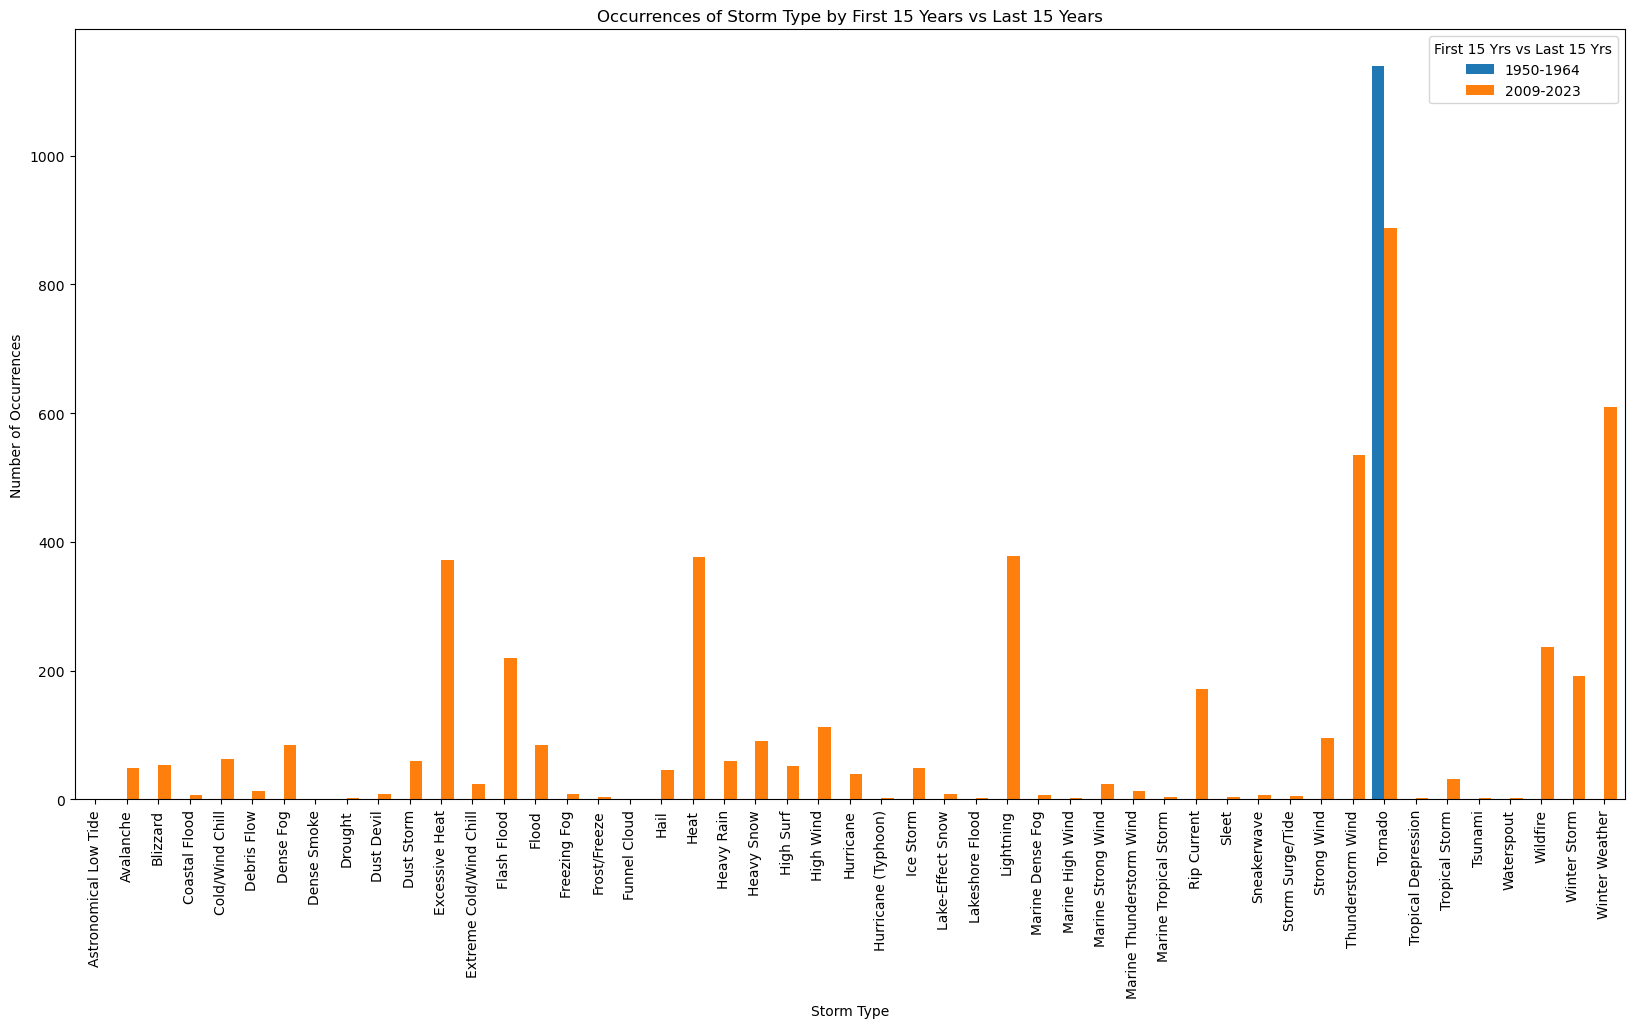

In [14]:
# This double bar chart serves to show that the first 15 years of data only contains storm data on tornados only, while the most recent 15 years takes into account many more storm types.
# Group by "EVENT_TYPE" and "YEAR" and count occurrences
grouped_df = event_type_and_year_df.groupby(['EVENT_TYPE', 'First 15 Years']).size().unstack()

# Plot the double bar chart
ax = grouped_df.plot(kind='bar', width=0.8, figsize=(20, 10))

# Customize the plot
ax.legend(['1950-1964', '2009-2023'], title='First 15 Yrs vs Last 15 Yrs')
ax.set_xlabel('Storm Type')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Occurrences of Storm Type by First 15 Years vs Last 15 Years')

# Saving the plot as an image (e.g., PNG format)
plt.savefig('occurrences.png')

# # Show the plot
plt.show()

In [15]:
# Narrow DataFrame to show only "YEAR" and "EVENT_TYPE" columns
total_deaths_and_year_df = combined_df[['YEAR', 'TOTAL DEATHS']]
total_deaths_and_year_df

,YEAR,TOTAL DEATHS
0,1950,0
1,1950,0
2,1950,5
3,1950,0
4,1950,0
...,...,...
6230,2023,3
6231,2023,2
6232,2023,0
6233,2023,0


In [16]:
combined_deaths_per_year_df = total_deaths_and_year_df.groupby('YEAR')['TOTAL DEATHS'].sum().reset_index()
combined_deaths_per_year_df

,YEAR,TOTAL DEATHS
0,1950,67
1,1951,29
2,1952,231
3,1953,517
4,1954,33
5,1955,124
6,1956,82
7,1957,187
8,1958,62
9,1959,54


In [17]:
# Filter data for the two 15-year periods
first_15_years = combined_deaths_per_year_df[combined_deaths_per_year_df['YEAR'].between(1950, 1964)]
first_15_years['YEAR'] = first_15_years['YEAR'].rank()
first_15_years

C:\Users\lnfme\AppData\Local\Temp\ipykernel_24332\2227553653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_15_years['YEAR'] = first_15_years['YEAR'].rank()


,YEAR,TOTAL DEATHS
0,1.0,67
1,2.0,29
2,3.0,231
3,4.0,517
4,5.0,33
5,6.0,124
6,7.0,82
7,8.0,187
8,9.0,62
9,10.0,54


In [18]:
last_15_years = combined_deaths_per_year_df[combined_deaths_per_year_df['YEAR'].between(2009, 2023)]
last_15_years['YEAR'] = last_15_years['YEAR'].rank()
last_15_years

C:\Users\lnfme\AppData\Local\Temp\ipykernel_24332\158233182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_15_years['YEAR'] = last_15_years['YEAR'].rank()


,YEAR,TOTAL DEATHS
15,1.0,248
16,2.0,327
17,3.0,915
18,4.0,401
19,5.0,306
20,6.0,269
21,7.0,352
22,8.0,354
23,9.0,461
24,10.0,623


In [19]:
merged_first_and_last_years = pd.merge(first_15_years, last_15_years, on='YEAR', how='outer')
merged_first_and_last_years.rename(columns={'TOTAL DEATHS_x': 'TOTAL DEATHS: 1950-1965'})
merged_first_and_last_years.rename(columns={'TOTAL DEATHS_y': 'TOTAL DEATHS: 2009-2023'})
merged_first_and_last_years

,YEAR,TOTAL DEATHS_x,TOTAL DEATHS_y
0,1.0,67,248
1,2.0,29,327
2,3.0,231,915
3,4.0,517,401
4,5.0,33,306
5,6.0,124,269
6,7.0,82,352
7,8.0,187,354
8,9.0,62,461
9,10.0,54,623


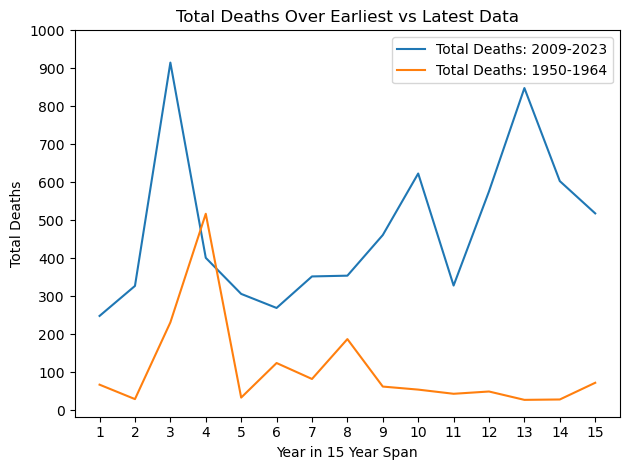

In [20]:
# This double line chart compares deaths in the first 15 years (1950-965) of data vs the last 15 years (2009-2023) of data

plt.plot(merged_first_and_last_years['YEAR'], merged_first_and_last_years['TOTAL DEATHS_y'], label='Total Deaths: 2009-2023')
plt.plot(merged_first_and_last_years['YEAR'], merged_first_and_last_years['TOTAL DEATHS_x'], label='Total Deaths: 1950-1964')
plt.title('Total Deaths Over Earliest vs Latest Data')
plt.xlabel('Year in 15 Year Span')
plt.ylabel('Total Deaths')
plt.xticks(merged_first_and_last_years['YEAR'])
plt.yticks(range(0, 1001, 100))
plt.tight_layout()
plt.legend()
# Saving the plot as an image (e.g., PNG format)
plt.savefig('line_graph.png')
plt.show()